In [ ]:
# !pip install -Uq fastai
!pip install -Uq "timm==0.6.2.dev0"

from google.colab import drive, runtime
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.9/497.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00


ValueError: mount failed

In [ ]:
### Importing common items
import sys
import numpy as np
import pandas as pd
from PIL import Image

from fastai.vision.all import *
import timm

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.grid'] = False

In [ ]:
base_directory = '/content/drive/MyDrive/ThesisGD/'
images_by_name_file = base_directory + 'images_by_name.pkl'
images_by_oid_file = base_directory + 'images_by_oid.pkl'

sys.path.insert(0, base_directory)

In [ ]:
# base_directory = '/home/shoaib/ZTFDataChallenge/'
# images_by_name_file = base_directory + 'GoogleDrive/images_by_name.pkl'
# images_by_oid_file = base_directory + 'GoogleDrive/images_by_oid.pkl'

# sys.path.insert(0, base_directory + 'GoogleDrive/')

In [ ]:
from fastai_catagory_run import *

In [ ]:
### Loading the images by name
df = pd.read_pickle(images_by_name_file)

# ### Loading the lightcurves by OID
# df = pd.read_pickle(images_by_oid_file)

In [ ]:
df = df.dropna(axis=0)

df = df.query("r_n_good_det_1day >= 20 and g_n_good_det_1day >= 20")
# df = df.query("n_good_det_1day >= 20")

catagories = ['Q', 'QR', 'QX']
# catagories = ['Q', 'QX']
# catagories = df.type.value_counts().index[:6]
df = df.query("type in @catagories")
df

,name,type,z,X,r_n_good_det,g_n_good_det,X_1day,r_n_good_det_1day,g_n_good_det_1day
42,1WGA J0852.8+1346,QX,1.49,<PIL.Image.Image image mode=RGB size=50x50>,449.0,121.0,<PIL.Image.Image image mode=RGB size=50x50>,140.0,113.0
43,1WGA J0924.4+5215,QX,0.73,<PIL.Image.Image image mode=RGB size=50x50>,408.0,161.0,<PIL.Image.Image image mode=RGB size=50x50>,208.0,146.0
45,1WGA J1008.6+5437,QX,0.78,<PIL.Image.Image image mode=RGB size=50x50>,531.0,316.0,<PIL.Image.Image image mode=RGB size=50x50>,244.0,245.0
46,1WGA J1009.4+5334,QX,1.73,<PIL.Image.Image image mode=RGB size=50x50>,501.0,288.0,<PIL.Image.Image image mode=RGB size=50x50>,236.0,224.0
48,1WGA J1052.6+5724,QX,1.11,<PIL.Image.Image image mode=RGB size=50x50>,812.0,614.0,<PIL.Image.Image image mode=RGB size=50x50>,312.0,317.0
...,...,...,...,...,...,...,...,...,...
30246,XMDS J02234-0454,QX,0.60,<PIL.Image.Image image mode=RGB size=50x50>,169.0,152.0,<PIL.Image.Image image mode=RGB size=50x50>,142.0,131.0
30249,XMS J103020.7+305637,QX,1.07,<PIL.Image.Image image mode=RGB size=50x50>,274.0,229.0,<PIL.Image.Image image mode=RGB size=50x50>,200.0,188.0
30250,XMS J123139.9+641123,QX,1.02,<PIL.Image.Image image mode=RGB size=50x50>,784.0,713.0,<PIL.Image.Image image mode=RGB size=50x50>,335.0,307.0
30256,ZC 2357-027,Q,2.61,<PIL.Image.Image image mode=RGB size=50x50>,172.0,155.0,<PIL.Image.Image image mode=RGB size=50x50>,136.0,130.0


### Deciding which models to use

In [ ]:
timm.list_models('swin*', pretrained=True)

['swin_base_patch4_window7_224',
 'swin_base_patch4_window7_224_in22k',
 'swin_base_patch4_window12_384',
 'swin_base_patch4_window12_384_in22k',
 'swin_large_patch4_window7_224',
 'swin_large_patch4_window7_224_in22k',
 'swin_large_patch4_window12_384',
 'swin_large_patch4_window12_384_in22k',
 'swin_s3_base_224',
 'swin_s3_small_224',
 'swin_s3_tiny_224',
 'swin_small_patch4_window7_224',
 'swin_tiny_patch4_window7_224',
 'swinv2_base_window8_256',
 'swinv2_base_window12_192_22k',
 'swinv2_base_window12to16_192to256_22kft1k',
 'swinv2_base_window12to24_192to384_22kft1k',
 'swinv2_base_window16_256',
 'swinv2_cr_small_224',
 'swinv2_cr_small_ns_224',
 'swinv2_cr_tiny_ns_224',
 'swinv2_large_window12_192_22k',
 'swinv2_large_window12to16_192to256_22kft1k',
 'swinv2_large_window12to24_192to384_22kft1k',
 'swinv2_small_window8_256',
 'swinv2_small_window16_256',
 'swinv2_tiny_window8_256',
 'swinv2_tiny_window16_256']

In [ ]:
models = ['resnet18',
          'resnet50',
          'densenet121',
          'convnext_base',
          'resnext50_32x4d',
          'efficientvit_b0',
          'efficientvit_m5',
          'efficientnetv2_rw_m',
          'vit_base_mci_224',
          'swin_base_patch4_window7_224',
        ]

pass_if_nonempty = [True for model in models]
batch_sizes = [32 for model in models]

save_dirs = [base_directory + 'LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/'+ model + '/' for model in models]
save_dirs

['/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/resnet18/',
 '/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/resnet50/',
 '/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/densenet121/',
 '/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/convnext_base/',
 '/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/resnext50_32x4d/',
 '/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/efficientvit_b0/',
 '/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/efficientvit_m5/',
 '/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/efficientnetv2_rw_m/',


### Densenet121 what's with the high loss images?

In [ ]:
def run_a_model(**kwargs):
    model_run = FastaiRun(**kwargs)
    try:
        model_run.start_learning()
    except RuntimeError as e:
        if kwargs['batch_size'] <= 8:
            raise RuntimeError(f"Model {kwargs['cnn_model']} could not run because of insufficient GPU memory.")
        else:
            print(str(e) + f"\n\nNow trying with batch_size {kwargs['batch_size'] / 2}")
            new_kwargs = kwargs.copy()
            new_kwargs['batch_size'] = kwargs['batch_size'] / 2
            run_a_model(**kwargs)
    model_run.save_classification_results()
    return model_run

In [ ]:
print(save_dirs[2])
print(models[2])

/content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/densenet121/
densenet121


In [ ]:
foo = run_a_model(save_directory=save_dirs[2],
                  image_df=df,
                  image_df_Xcol='X_1day',
                  image_df_ycol='type',
                  pass_if_nonempty_dir=False,
                  overwrite_save_directory=False,
                  cnn_model=models[2],
                  batch_size=32)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
foo.interp.top_losses()

(TensorBase([9.7333e+01, 9.2093e+01, 8.2955e+01,  ..., 5.1354e-02,
             4.6563e-02, 3.6131e-02]),
 TensorBase([2547, 2314,  377,  ..., 2037, 1956,  614]))

In [ ]:
foo.test_interp.top_losses()

(TensorBase([1.0170e+02, 9.1976e+01, 8.6243e+01,  ..., 4.1811e-02,
             3.4891e-02, 2.0403e-02]),
 TensorBase([3135, 1302, 1696,  ...,  317,  692, 2950]))

In [ ]:
top_losses_test = foo.test_interp.top_losses(largest=True, items=True)

In [ ]:
top_losses_test

(TensorBase([1.0170e+02, 9.1976e+01, 8.6243e+01,  ..., 4.1811e-02,
             3.4891e-02, 2.0403e-02]),
 TensorBase([3135, 1302, 1696,  ...,  317,  692, 2950]),
                            name type     z  \
 21841  SDSS J134042.10+100223.5   QR  0.65   
 22279  SDSS J131245.56+510817.1   QR  0.82   
 14568  SDSS J154819.11+083756.9   QR  0.55   
 7721   SDSS J155130.78+310451.5   QR  1.13   
 11291  SDSS J014028.12+132320.7   QR  0.49   
 ...                         ...  ...   ...   
 17723  SDSS J142958.13+614243.6    Q  0.67   
 13804  SDSS J154926.59+440421.7    Q  0.66   
 4903   SDSS J164958.89+471837.1    Q  1.00   
 9684   SDSS J001328.20+135827.9    Q  3.57   
 10108  SDSS J153944.70+562450.4    Q  2.31   
 
                                                  X  r_n_good_det  \
 21841  <PIL.Image.Image image mode=RGB size=50x50>         165.0   
 22279  <PIL.Image.Image image mode=RGB size=50x50>         405.0   
 14568  <PIL.Image.Image image mode=RGB size=50x50>         225.

In [ ]:
top_losses_test[2]

,name,type,z,X,r_n_good_det,g_n_good_det,X_1day,r_n_good_det_1day,g_n_good_det_1day
21841,SDSS J134042.10+100223.5,QR,0.65,<PIL.Image.Image image mode=RGB size=50x50>,165.0,172.0,<PIL.Image.Image image mode=RGB size=50x50>,140.0,146.0
22279,SDSS J131245.56+510817.1,QR,0.82,<PIL.Image.Image image mode=RGB size=50x50>,405.0,380.0,<PIL.Image.Image image mode=RGB size=50x50>,219.0,217.0
14568,SDSS J154819.11+083756.9,QR,0.55,<PIL.Image.Image image mode=RGB size=50x50>,225.0,122.0,<PIL.Image.Image image mode=RGB size=50x50>,166.0,118.0
7721,SDSS J155130.78+310451.5,QR,1.13,<PIL.Image.Image image mode=RGB size=50x50>,613.0,567.0,<PIL.Image.Image image mode=RGB size=50x50>,306.0,294.0
11291,SDSS J014028.12+132320.7,QR,0.49,<PIL.Image.Image image mode=RGB size=50x50>,370.0,236.0,<PIL.Image.Image image mode=RGB size=50x50>,204.0,206.0
...,...,...,...,...,...,...,...,...,...
17723,SDSS J142958.13+614243.6,Q,0.67,<PIL.Image.Image image mode=RGB size=50x50>,482.0,425.0,<PIL.Image.Image image mode=RGB size=50x50>,263.0,253.0
13804,SDSS J154926.59+440421.7,Q,0.66,<PIL.Image.Image image mode=RGB size=50x50>,1067.0,931.0,<PIL.Image.Image image mode=RGB size=50x50>,331.0,313.0
4903,SDSS J164958.89+471837.1,Q,1.00,<PIL.Image.Image image mode=RGB size=50x50>,712.0,553.0,<PIL.Image.Image image mode=RGB size=50x50>,357.0,310.0
9684,SDSS J001328.20+135827.9,Q,3.57,<PIL.Image.Image image mode=RGB size=50x50>,365.0,238.0,<PIL.Image.Image image mode=RGB size=50x50>,251.0,176.0


In [ ]:
top10_losses_test_df = top_losses_test[2].iloc[:10]
top10_losses_test_df

,name,type,z,X,r_n_good_det,g_n_good_det,X_1day,r_n_good_det_1day,g_n_good_det_1day
21841,SDSS J134042.10+100223.5,QR,0.65,<PIL.Image.Image image mode=RGB size=50x50>,165.0,172.0,<PIL.Image.Image image mode=RGB size=50x50>,140.0,146.0
22279,SDSS J131245.56+510817.1,QR,0.82,<PIL.Image.Image image mode=RGB size=50x50>,405.0,380.0,<PIL.Image.Image image mode=RGB size=50x50>,219.0,217.0
14568,SDSS J154819.11+083756.9,QR,0.55,<PIL.Image.Image image mode=RGB size=50x50>,225.0,122.0,<PIL.Image.Image image mode=RGB size=50x50>,166.0,118.0
7721,SDSS J155130.78+310451.5,QR,1.13,<PIL.Image.Image image mode=RGB size=50x50>,613.0,567.0,<PIL.Image.Image image mode=RGB size=50x50>,306.0,294.0
11291,SDSS J014028.12+132320.7,QR,0.49,<PIL.Image.Image image mode=RGB size=50x50>,370.0,236.0,<PIL.Image.Image image mode=RGB size=50x50>,204.0,206.0
8447,SDSS J110249.85+525012.6,QR,0.69,<PIL.Image.Image image mode=RGB size=50x50>,293.0,303.0,<PIL.Image.Image image mode=RGB size=50x50>,233.0,243.0
14092,SDSS J164329.68+380851.9,QR,0.57,<PIL.Image.Image image mode=RGB size=50x50>,856.0,837.0,<PIL.Image.Image image mode=RGB size=50x50>,372.0,391.0
4037,SDSS J103536.23+152741.4,QR,1.81,<PIL.Image.Image image mode=RGB size=50x50>,272.0,242.0,<PIL.Image.Image image mode=RGB size=50x50>,180.0,171.0
15403,SDSS J150605.90+435903.1,QR,0.92,<PIL.Image.Image image mode=RGB size=50x50>,627.0,606.0,<PIL.Image.Image image mode=RGB size=50x50>,309.0,310.0
15097,SDSS J160325.52+521222.4,QR,0.81,<PIL.Image.Image image mode=RGB size=50x50>,1574.0,1539.0,<PIL.Image.Image image mode=RGB size=50x50>,461.0,456.0


In [ ]:
top10_losses_test_df['name'].to_list()

['SDSS J134042.10+100223.5',
 'SDSS J131245.56+510817.1',
 'SDSS J154819.11+083756.9',
 'SDSS J155130.78+310451.5',
 'SDSS J014028.12+132320.7',
 'SDSS J110249.85+525012.6',
 'SDSS J164329.68+380851.9',
 'SDSS J103536.23+152741.4',
 'SDSS J150605.90+435903.1',
 'SDSS J160325.52+521222.4']

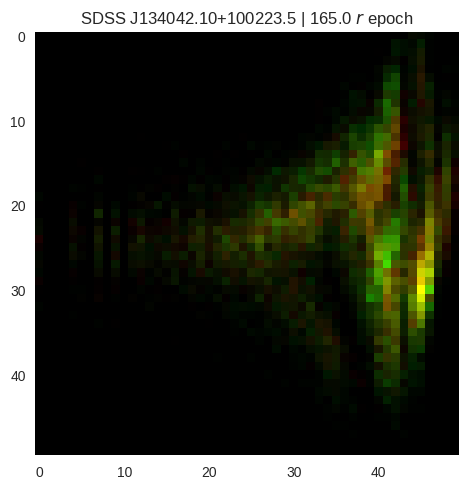

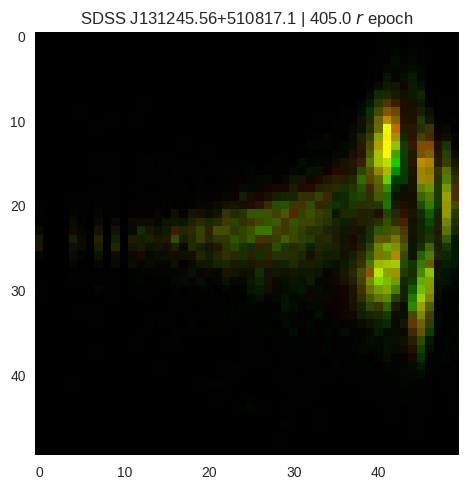

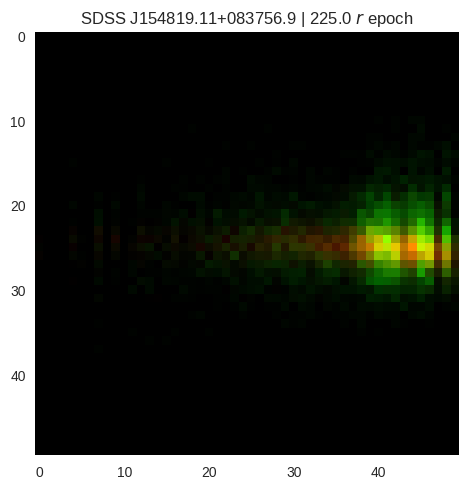

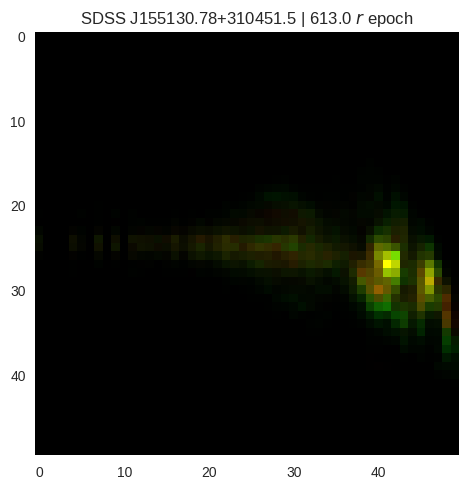

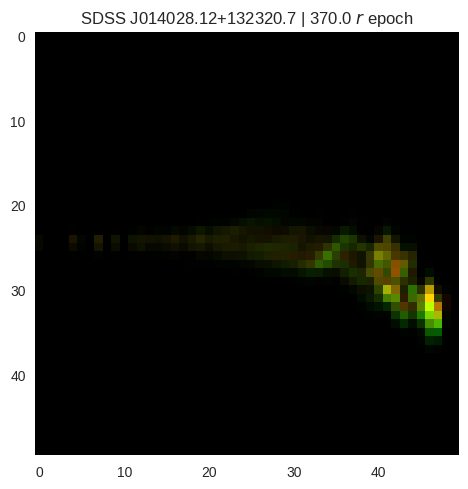

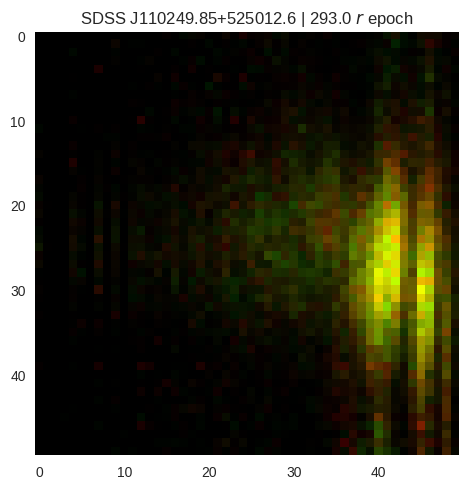

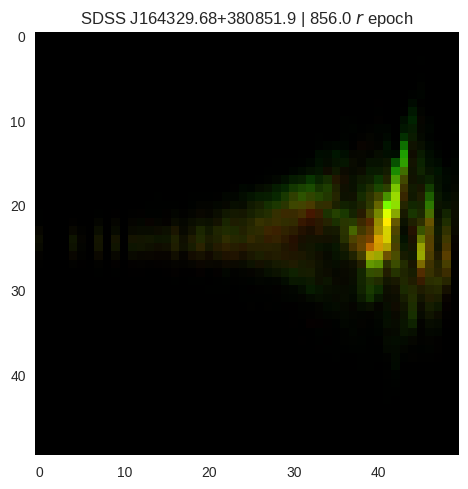

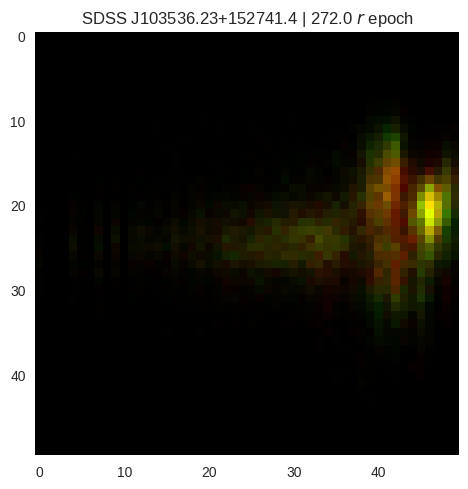

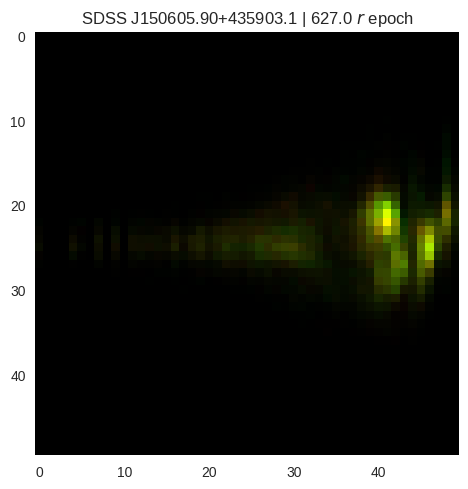

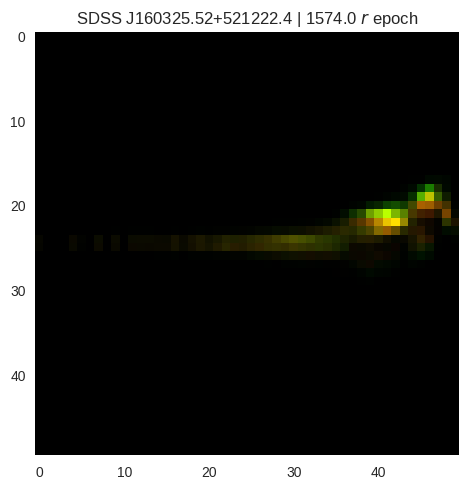

In [ ]:
for idx, row in top10_losses_test_df.iterrows():
    plt.imshow(row['X_1day'])
    plt.title(f"{row['name']} | {row['r_n_good_det']} $r$ epoch")
    plt.show()

In [ ]:




for model, save_dir, pass_run, batch_size in zip(models, save_dirs, pass_if_nonempty, batch_sizes):
    try:
        run_a_model(save_directory=save_dir,
                    image_df=df,
                    image_df_Xcol='X_1day',
                    image_df_ycol='type',
                    pass_if_nonempty_dir=pass_run,
                    overwrite_save_directory=True,
                    cnn_model=model,
                    batch_size=batch_size)
    except Exception as e:
        print(model + ' did not run due to the exception:\n' + str(e))

resnet18 did not run due to the exception:
Save directory is not empty and the object will pass it: /content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/resnet18/
resnet50 did not run due to the exception:
Save directory is not empty and the object will pass it: /content/drive/MyDrive/ThesisGD/LCsByName_ImbalancedTraining_F1Metric_WeightedCrossEntropLoss_3QSOClasses/resnet50/


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.941591,1.362064,0.426833,0.363069,0.396971,0.300532,02:34


Better model found at epoch 0 with f1_score value: 0.3005315704026726.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.657418,1.299165,0.411963,0.360073,0.387382,0.293543,03:15
1,1.745013,1.280841,0.420412,0.363164,0.394500,0.299243,03:15
2,1.530382,1.274604,0.396756,0.370876,0.417958,0.295599,03:15
3,1.595782,1.257294,0.414329,0.365283,0.407309,0.299027,03:15
4,1.475306,1.233595,0.444069,0.370728,0.424399,0.316539,03:15
5,1.525880,1.211997,0.473471,0.369447,0.418228,0.325533,03:15
6,1.387174,1.207332,0.479554,0.374125,0.423394,0.331243,03:16
7,1.315309,1.212877,0.452518,0.369111,0.412309,0.317720,03:17
8,1.333477,1.191902,0.457249,0.372279,0.431147,0.323069,03:16
9,1.315403,1.203974,0.473133,0.371265,0.414758,0.325604,03:15


Better model found at epoch 0 with f1_score value: 0.2935425868090384.
Better model found at epoch 1 with f1_score value: 0.29924265297789326.
Better model found at epoch 4 with f1_score value: 0.3165388030009038.
Better model found at epoch 5 with f1_score value: 0.3255330455557625.
Better model found at epoch 6 with f1_score value: 0.33124321275684404.
No improvement since epoch 6: early stopping


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_base_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_base_1k_224_ema.pth


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.707158,1.346542,0.403853,0.373307,0.413012,0.300866,06:55


Better model found at epoch 0 with f1_score value: 0.30086647839041497.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.470883,1.157016,0.495438,0.380364,0.419905,0.336501,18:20
1,1.384777,1.137768,0.513011,0.374617,0.412523,0.339486,18:21
2,1.301735,1.205809,0.456911,0.379588,0.423471,0.323800,18:20
3,1.312703,1.180377,0.527543,0.367662,0.396612,0.336626,18:20


Better model found at epoch 0 with f1_score value: 0.33650139511872984.
Better model found at epoch 1 with f1_score value: 0.33948559366514397.
No improvement since epoch 0: early stopping


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnext50_32x4d_a1h-0146ab0a.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d_a1h-0146ab0a.pth


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.974910,1.459303,0.376816,0.365065,0.394898,0.280629,02:55


Better model found at epoch 0 with f1_score value: 0.28062859126117096.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.608214,1.379178,0.365664,0.362927,0.386851,0.275196,04:06
1,1.652785,1.267115,0.406556,0.369453,0.410097,0.298525,04:06
2,1.560260,1.268303,0.401825,0.365511,0.401549,0.293611,04:06
3,1.455529,1.244139,0.441027,0.376362,0.429139,0.317536,04:06
4,1.332098,1.302578,0.451842,0.371441,0.414932,0.316142,04:06
5,1.317726,1.258549,0.418723,0.367680,0.402667,0.299987,04:06
6,1.162650,1.207035,0.445083,0.362984,0.399146,0.306497,04:06


Better model found at epoch 0 with f1_score value: 0.27519564884183356.
Better model found at epoch 1 with f1_score value: 0.2985251910251943.
Better model found at epoch 3 with f1_score value: 0.3175357266231691.
No improvement since epoch 3: early stopping


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


efficientvit_b0 did not run due to the exception:
Unknown model (efficientvit_b0)
efficientvit_m5 did not run due to the exception:
Unknown model (efficientvit_m5)


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnetv2_rw_m_agc-3d90cb1e.pth" to /root/.cache/torch/hub/checkpoints/efficientnetv2_rw_m_agc-3d90cb1e.pth


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.876069,1.379582,0.383576,0.363839,0.390111,0.285801,04:44


Better model found at epoch 0 with f1_score value: 0.2858005262355854.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.723498,1.351915,0.362622,0.357430,0.381439,0.273360,06:57
1,1.696372,1.322735,0.378844,0.356666,0.382652,0.279330,06:57
2,1.640148,1.310900,0.372423,0.362409,0.394169,0.281906,06:58
3,1.639099,1.323343,0.407570,0.355678,0.369979,0.288866,06:59
4,1.553705,1.296799,0.413315,0.360007,0.384506,0.293987,06:59
5,1.522112,1.311826,0.445083,0.362438,0.379205,0.308052,06:59
6,1.373433,1.286502,0.428861,0.367843,0.403215,0.307026,06:59
7,1.401267,1.290359,0.446435,0.366885,0.391195,0.311698,06:57
8,1.325727,1.301442,0.456573,0.364267,0.391298,0.312833,06:58


Better model found at epoch 0 with f1_score value: 0.27336031046656173.
Better model found at epoch 1 with f1_score value: 0.27933030603137654.
Better model found at epoch 2 with f1_score value: 0.28190584284299974.
Better model found at epoch 3 with f1_score value: 0.288865685243979.
Better model found at epoch 4 with f1_score value: 0.2939866776834962.
Better model found at epoch 5 with f1_score value: 0.30805242162568036.
Better model found at epoch 7 with f1_score value: 0.311697895799884.
Better model found at epoch 8 with f1_score value: 0.31283320585556146.
No improvement since epoch 5: early stopping


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


vit_base_mci_224 did not run due to the exception:
Unknown model (vit_base_mci_224)


/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_base_patch4_window7_224_22kto1k.pth" to /root/.cache/torch/hub/checkpoints/swin_base_patch4_window7_224_22kto1k.pth


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.589004,1.250277,0.416695,0.351505,0.372584,0.287382,07:46


Better model found at epoch 0 with f1_score value: 0.2873822874713331.


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.353550,1.129536,0.530585,0.387046,0.438557,0.356936,10:20
1,1.318721,1.098097,0.569111,0.384114,0.428976,0.364899,10:20
2,1.236428,1.150823,0.496451,0.383921,0.429082,0.342208,10:21
3,1.164083,1.086930,0.565056,0.386006,0.442158,0.367609,10:20
4,1.128532,1.098572,0.559649,0.383571,0.435156,0.362493,10:20


Better model found at epoch 0 with f1_score value: 0.35693577794847536.
Better model found at epoch 1 with f1_score value: 0.3648990810884088.
Better model found at epoch 3 with f1_score value: 0.36760886467581294.
No improvement since epoch 1: early stopping


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
runtime.unassign()